# Linear Regression


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [4]:

# ==========================
# Load Dataset (Diabetes)
# ==========================
diabetes = datasets.load_diabetes()

# Convert to Pandas DataFrame
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target


In [5]:
# ==========================
# Explore Dataset
# ==========================
print("=== Dataset Description ===")
print(diabetes.DESCR[:500], "...")  # Print first 500 chars for brevity

print("\n=== First 5 Rows of Data ===")
print(diabetes_df.head())

print("\n=== Data Info ===")
print(diabetes_df.info())

print("\n=== Summary Statistics ===")
print(diabetes_df.describe())



=== Dataset Description ===
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measur ...

=== First 5 Rows of Data ===
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596 

In [6]:
# ==========================
# Split Dataset
# ==========================
X = diabetes_df.drop(columns=['target'])
y = diabetes_df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [7]:

# ==========================
# Train Linear Regression Model
# ==========================
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:

# Predictions
y_pred = model.predict(X_test)

# ==========================
# Evaluation Metrics
# ==========================
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Evaluation Metrics ===")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")




=== Evaluation Metrics ===
MSE: 2900.19
RMSE: 53.85
MAE: 42.79
R² Score: 0.45


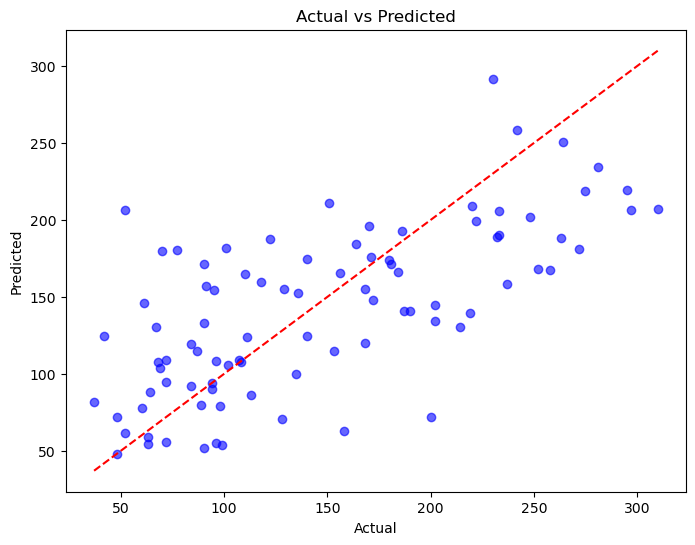

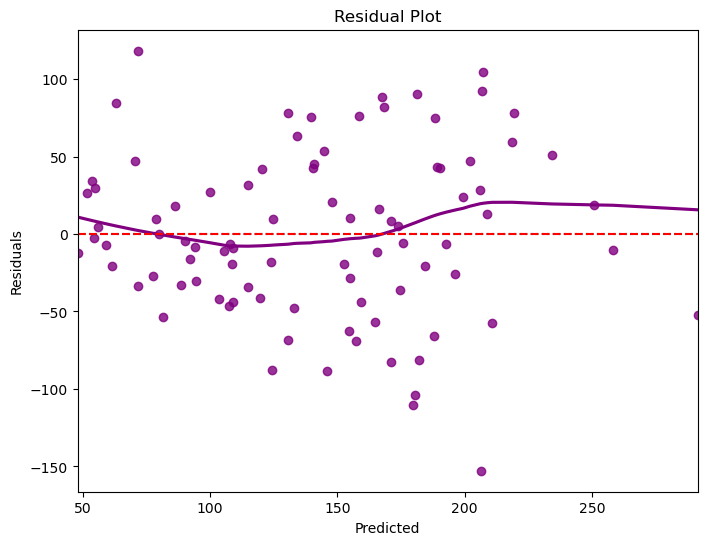

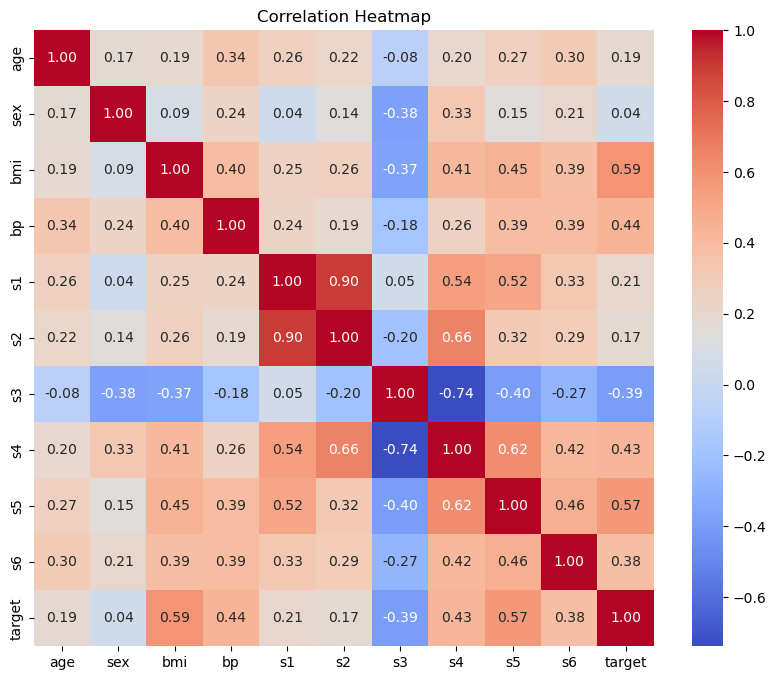


=== User Input Prediction ===
Sample features:
           age       sex       bmi        bp        s1        s2        s3  \
287  0.045341 -0.044642 -0.006206 -0.015999  0.125019  0.125198  0.019187   

           s4        s5       s6  
287  0.034309  0.032432 -0.00522  
Predicted Target Value: 139.55


In [9]:
# ==========================
# Visualizations
# ==========================

# Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# Residual Plot
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, color="purple")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(diabetes_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# ==========================
# User Input Prediction
# ==========================
print("\n=== User Input Prediction ===")
sample = X_test.iloc[0].to_frame().T  # take one row as example
print("Sample features:\n", sample)

predicted_value = model.predict(sample)[0]
print(f"Predicted Target Value: {predicted_value:.2f}")
